# 附录C-量化统计分析及指标应用

In [1]:
from __future__ import print_function
from __future__ import division

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_context(rc={'figure.figsize': (14, 7) } )
figzize_me = figsize =(14, 7)
import warnings; warnings.filterwarnings('ignore')

import os
import sys
sys.path.append(os.path.abspath('../'))
import abupy
abupy.env.enable_example_env_ipython()

only use pandas calc nd, please install talib!
enable example env will only read RomDataBu/df_kl.h5


## C.1 量化统计分析应用

In [2]:
from abupy import ABuSymbolPd
tsla_df = ABuSymbolPd.make_kl_df('usTSLA', n_folds=2)
tsla_df.tail()

,close,high,low,p_change,open,pre_close,volume,date,date_week,key,atr21,atr14
2016-07-20,228.36,229.800,225.00,1.38,226.47,225.26,2568498,20160720,2,499,9.192273,8.723406
2016-07-21,220.50,227.847,219.10,-3.44,226.00,228.36,4428651,20160721,3,500,9.171070,8.725091
2016-07-22,222.27,224.500,218.88,0.80,221.99,220.50,2579692,20160722,4,501,9.185781,8.779013
2016-07-25,230.01,231.390,221.37,3.48,222.27,222.27,4490683,20160725,0,502,9.266934,8.929798
2016-07-26,225.93,228.740,225.63,-1.77,227.34,230.01,41833,20160726,1,503,9.133747,8.754098


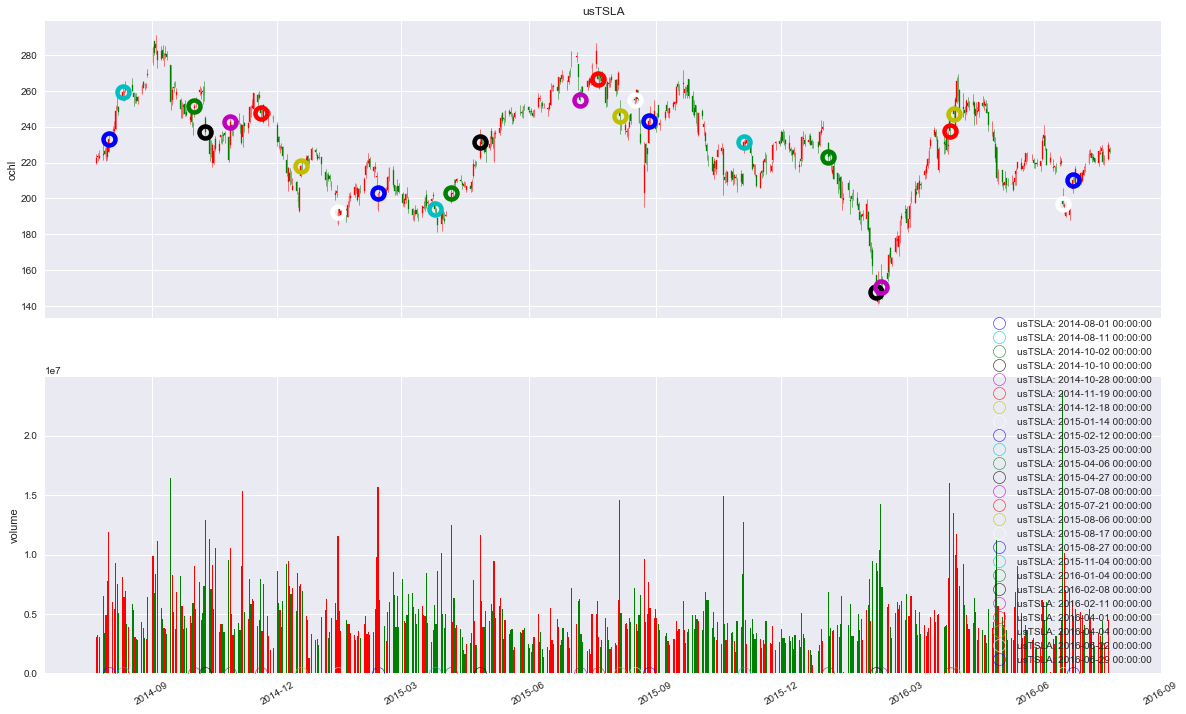

In [3]:
from abupy import tl
jumps = tl.jump.calc_jump(tsla_df)

In [4]:
jumps

,abs_pct_change,atr14,atr21,close,date,date_week,high,jump,jump_diff,jump_power,jump_threshold,key,low,open,p_change,pre_close,volume
2014-08-01,4.46,10.202000,8.932286,233.27,20140801,4,237.500,1,2.492985,1.083039,1.116429,7,226.00,226.090,4.46,223.300,11898130
2014-08-11,4.51,10.202000,8.932286,259.32,20140811,0,263.740,1,2.770194,2.479971,1.116429,13,255.00,255.480,4.51,248.130,8101276
2014-10-02,4.65,10.154076,10.090403,251.42,20141002,3,252.790,1,4.928123,1.038935,2.051333,50,245.36,250.200,4.65,240.240,9002001
2014-10-10,7.82,11.345929,10.921231,236.91,20141010,4,245.890,-1,5.272132,2.109204,2.051333,56,235.20,244.640,-7.82,257.010,12898280
2014-10-28,9.52,11.444137,11.271543,242.77,20141028,1,244.600,1,4.343254,1.514993,1.959333,68,228.25,229.600,9.52,221.670,10516300
2014-11-19,3.87,9.818979,10.187380,247.74,20141119,2,251.880,-1,4.581538,1.270316,1.777857,84,245.60,250.610,-3.87,257.700,7918486
2014-12-18,6.04,10.945711,10.713501,218.26,20141218,3,218.440,1,3.044666,1.964091,1.479286,104,211.80,212.380,6.04,205.820,7483349
2015-01-14,5.66,9.421595,9.551816,192.69,20150114,2,195.200,-1,3.572916,2.532945,1.749286,121,185.00,185.830,-5.66,204.250,11551860
2015-02-12,4.66,9.973987,9.782022,202.88,20150212,3,203.088,-1,3.905589,2.486693,1.835333,141,193.28,193.570,-4.66,212.800,15649610
2015-03-25,3.68,7.711186,8.124494,194.30,20150325,2,198.590,-1,2.557521,1.223841,1.267857,169,192.70,198.270,-3.68,201.720,5730389


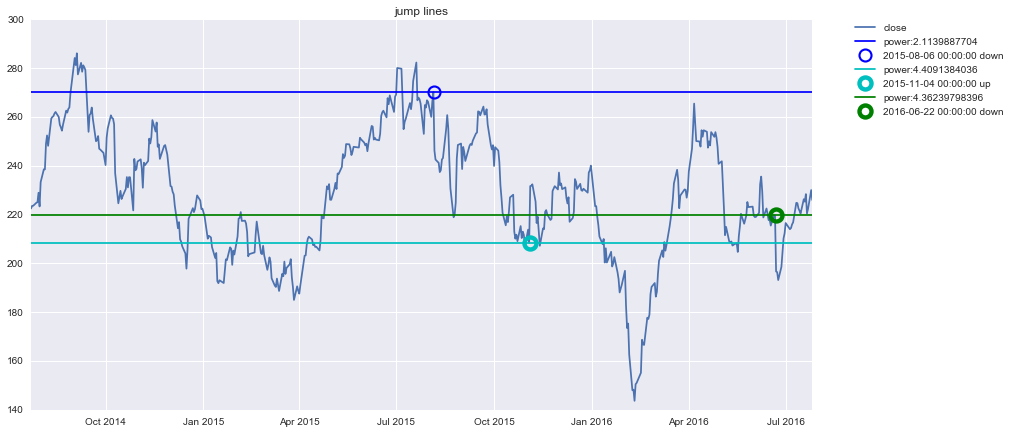

In [6]:
# sw[0]代表非时间因素的jump_power，sw[1]代表时间加权因素的jump_power，当sw[0]=1时与非加权方式相同，具体实现请参考源代码  
jump_pd = tl.jump.calc_jump_line_weight(tsla_df, sw=(0.5, 0.5))

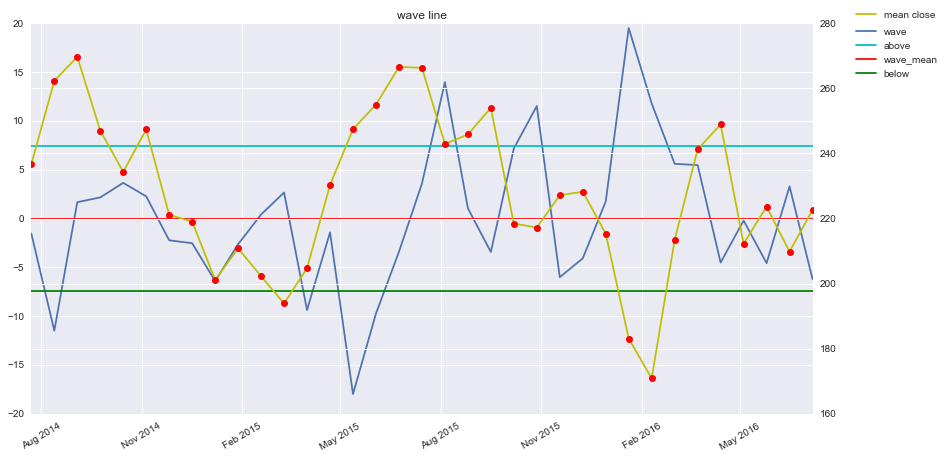

wave(wave_mean=7.206933462709587e-15, above=7.431979027749451, below=-7.431979027749437, now=-6.1922857142857097)

In [7]:
tl.wave.calc_wave_abs(tsla_df, xd=21, show=True)

## C.2 量化技术指标应用: 对量化策略失败结果的人工分析

In [7]:
from abupy import EStoreAbu, abu

abu_result_tuple_train = \
    abu.load_abu_result_tuple(5, EStoreAbu.E_STORE_TRAIN)

# 只筛选orders中有交易结果的单子
has_result = abu_result_tuple_train.orders_pd[
    abu_result_tuple_train.orders_pd.result == -1]

# 随便拿一个交易数据作为示例
sample_order = has_result.ix[100]

please wait! load_pickle....: /Users/Bailey/abu/data/cache/n5_train_capital
please wait! load_pickle....: /Users/Bailey/abu/data/cache/n5_train_benchmark


In [8]:
abupy.env.disable_example_env_ipython()

disable example env


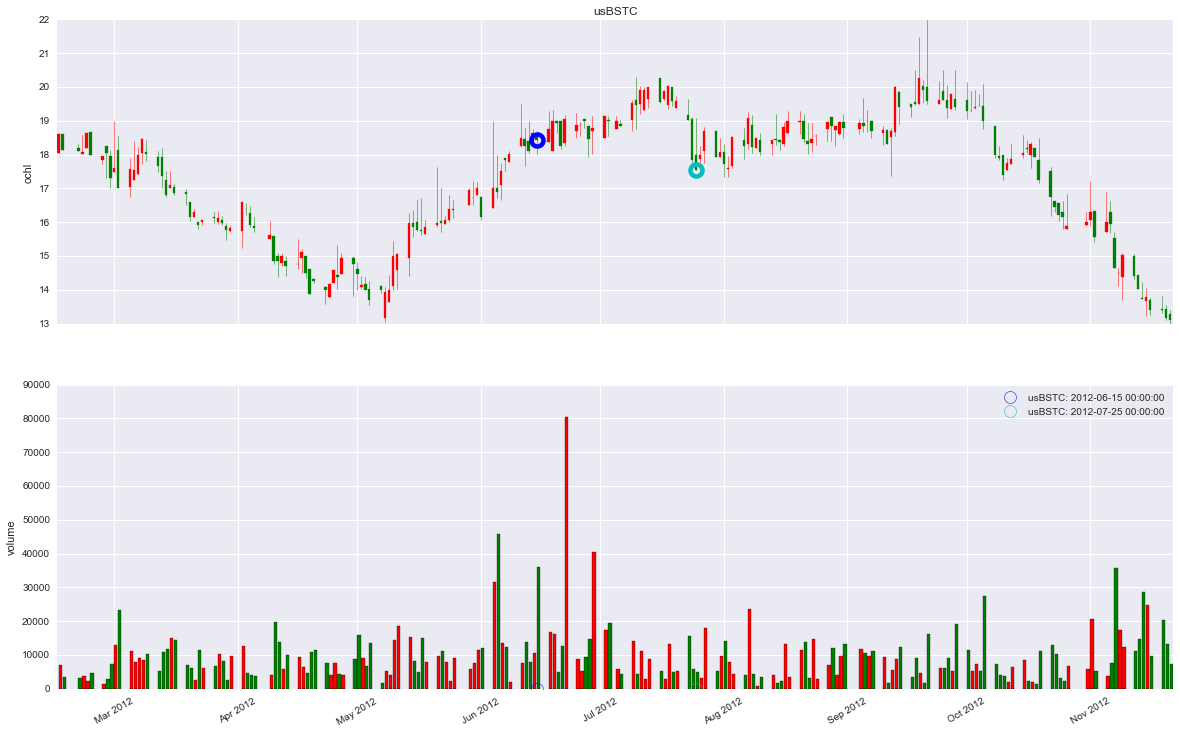

In [18]:
from abupy import ABuMarketDrawing
_ = ABuMarketDrawing.plot_candle_from_order(sample_order)

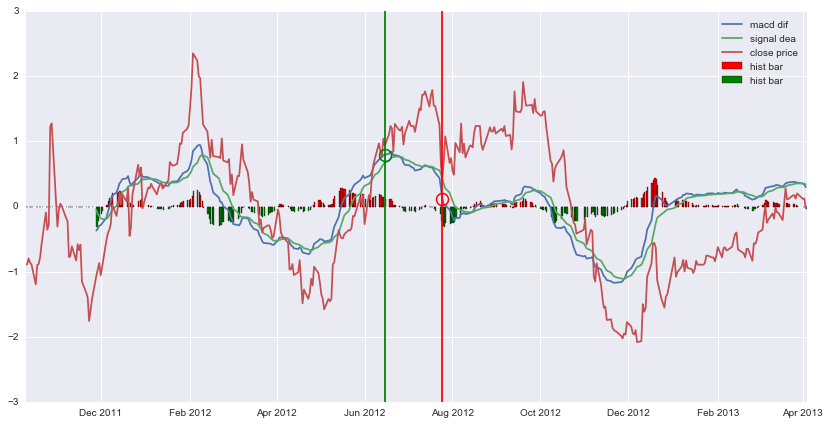

In [19]:
from abupy import nd
nd.macd.plot_macd_from_order(sample_order, date_ext=252)

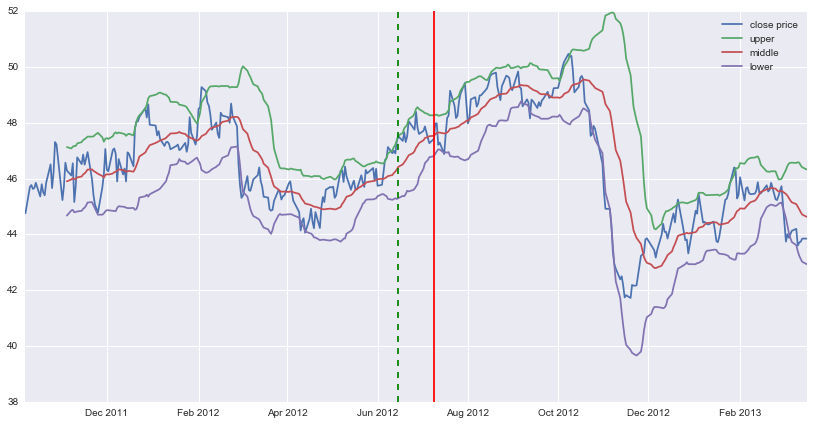

In [20]:
nd.boll.plot_boll_from_order(has_result.ix[100], date_ext=252)

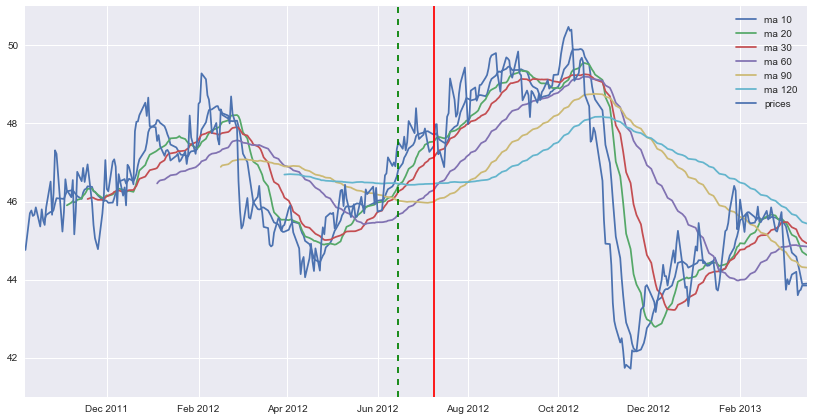

In [21]:
nd.ma.plot_ma_from_order(has_result.ix[100], date_ext=252, time_period=[10, 20, 30, 60, 90, 120])